In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import requests as req
from bs4 import BeautifulSoup
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### Dataframe Loading

The *com_eat* DataFrame gathers the mediane of the `HygieneScores` of all the inspections for each `Community Area` per `Year`.

In [2]:
com_eat = pd.read_csv('Eat_Year_CommArea.csv',sep=',') #creation of the dataframe

In [3]:
com_eat['Community Area'] = com_eat['Community Area'].apply(str)

In [4]:
com_eat = com_eat.drop(0)
com_eat = com_eat.drop(columns='Unnamed: 0')

In [5]:
com_eat.head()

Community Area       2010       2011       2012       2013       2014  \
1            1.0  15.477987  20.455000  22.807882  16.738938   8.751196   
2            2.0  21.198347  22.852349  22.532609  21.704082  11.488372   
3            3.0  20.787330  24.006024  11.751799  13.773585  20.977839   
4            4.0  26.603093  17.243421  15.121827  15.675926  14.199275   
5            5.0  10.803191  18.777778  16.933702  16.139896   9.604651   

        2015       2016       2017       2018       2019  
1  20.669767  24.554140  10.488806  21.881279  44.370968  
2   9.595506  25.105556  21.515789  43.433544  32.231343  
3  12.739766  16.446746  24.416667  28.463087  34.539823  
4  12.846154  14.522968  19.569697  22.158416  46.109948  
5  15.112821   8.227074   8.947137  18.960000  32.795918

In [6]:
com_eat['Median'] = com_eat.drop(columns='Community Area').median(axis=1)
com_eat.head()

Community Area       2010       2011       2012       2013       2014  \
1            1.0  15.477987  20.455000  22.807882  16.738938   8.751196   
2            2.0  21.198347  22.852349  22.532609  21.704082  11.488372   
3            3.0  20.787330  24.006024  11.751799  13.773585  20.977839   
4            4.0  26.603093  17.243421  15.121827  15.675926  14.199275   
5            5.0  10.803191  18.777778  16.933702  16.139896   9.604651   

        2015       2016       2017       2018       2019     Median  
1  20.669767  24.554140  10.488806  21.881279  44.370968  20.562384  
2   9.595506  25.105556  21.515789  43.433544  32.231343  22.118345  
3  12.739766  16.446746  24.416667  28.463087  34.539823  20.882585  
4  12.846154  14.522968  19.569697  22.158416  46.109948  16.459673  
5  15.112821   8.227074   8.947137  18.960000  32.795918  15.626358

### General Visualization

The following figure allows to visualize the `HygieneScores` per `Year` for each `Community Area`. It is possible to unselect the year we don't want to display clicking on its label on the right of the figure.

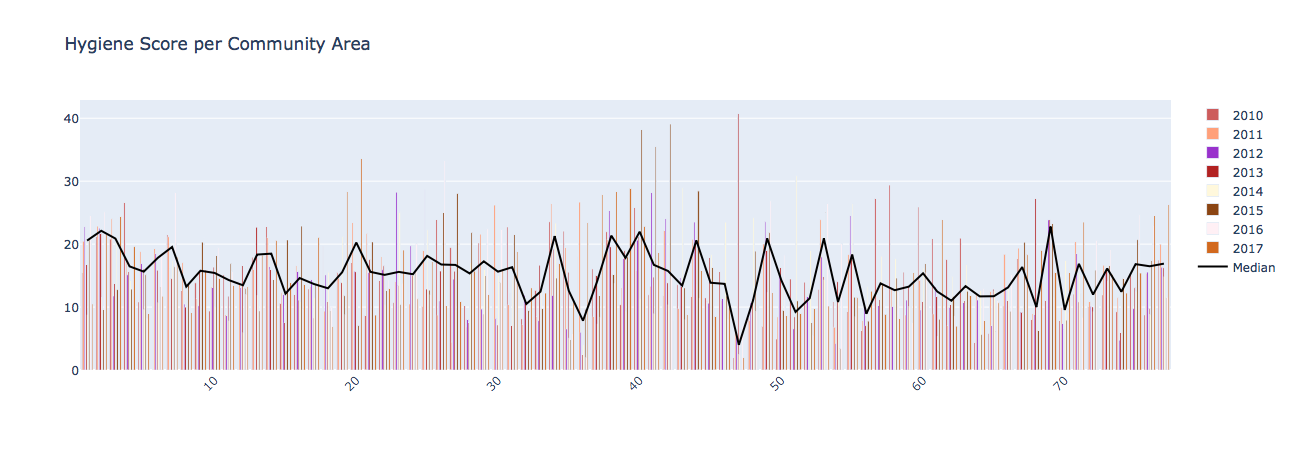

In [7]:
commarea = com_eat['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
av = []
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Bar(x=commarea, y=com_eat[x], name=x, marker_color=colorlist[c]))
    c += 1
    
fig.add_trace(go.Scatter(x=commarea, y=com_eat['Median'], name='Median', marker_color='black'))
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Hygiene Score per Community Area')

fig.show()

### Comments :
The figure allows to see in details the `HygieneScores` of each `Community Area`. The *Mean* line helps to see the bars tending to deviate from the `Median` computed. 

What we can see is that there is **no particular trend**, with a `Median` oscillating between *3* and *6*. There are 3 `Community Area` above 5 : **30 44 69**.

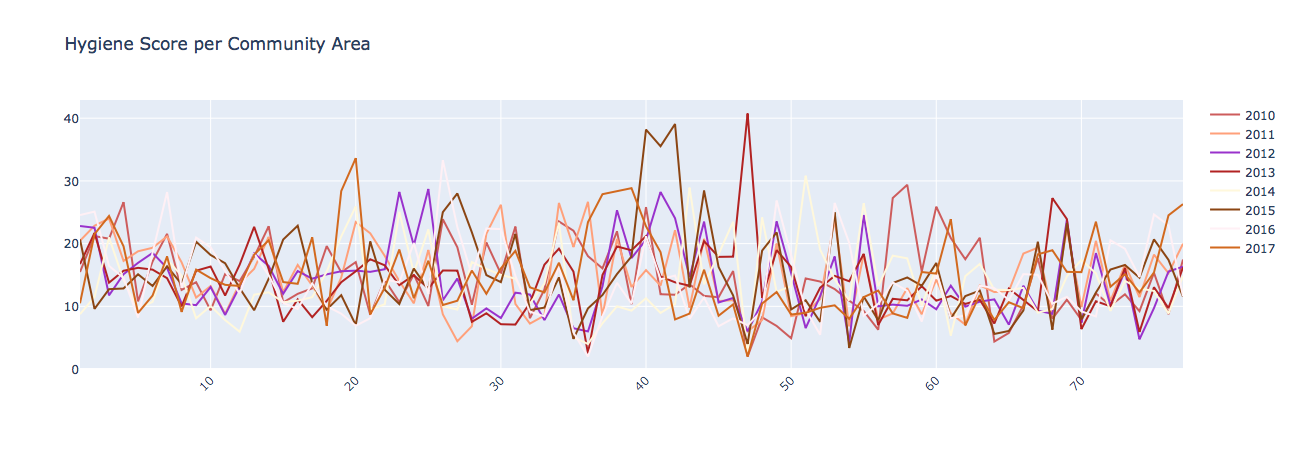

In [8]:
commarea = com_eat['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Scatter(x=commarea, y=com_eat[x], name=x, marker_color=colorlist[c]))
    c += 1
    
#fig.add_trace(go.Scatter(mode='markers', x=commarea, y=com_eat['Median'], name='Median', marker_color='black'))
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Hygiene Score per Community Area')

fig.show()

### Comments :
The figure has been computed to get another point of view of the `HygieneScores`. The same constatations are done than before, which confirm the **no particular trend**.

### Visualization Year By Year

The following figure allows to visualize the results in the ascending order - from top to bottom : the top `Community Areas` have the best `HygieneScore` (the *lowest*).

In [9]:
com_eat2010 = com_eat.sort_values(by=['2010'], ascending=False)

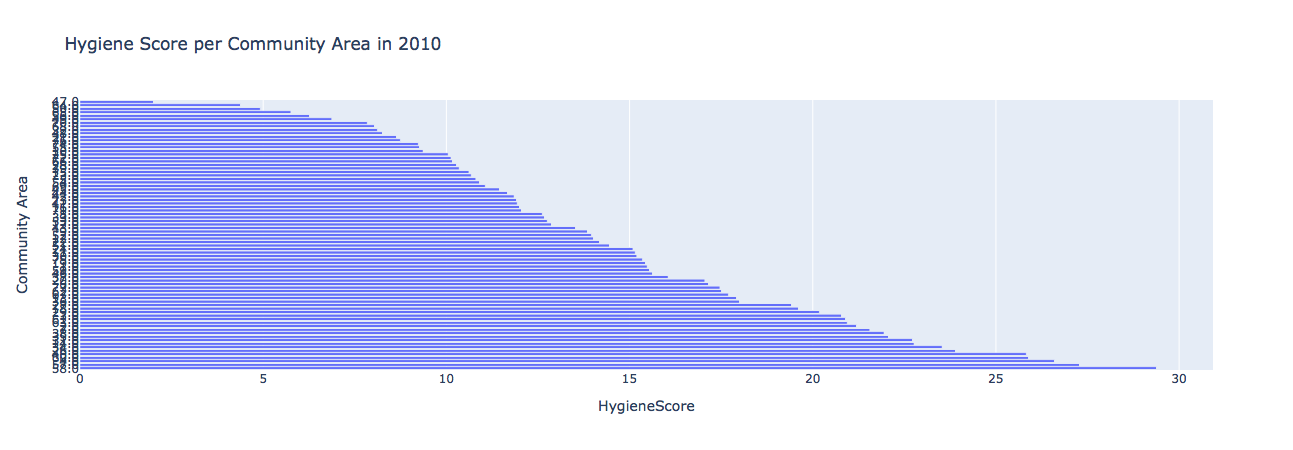

In [10]:
commarea = com_eat2010['Community Area']
fig = go.Figure(go.Bar(x=com_eat2010['2010'], y=commarea, orientation='h'))

fig.update_layout(title_text='Hygiene Score per Community Area in 2010', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='HygieneScore'))

fig.show()

In [11]:
com_eat2011 = com_eat.sort_values(by=['2011'], ascending=False)

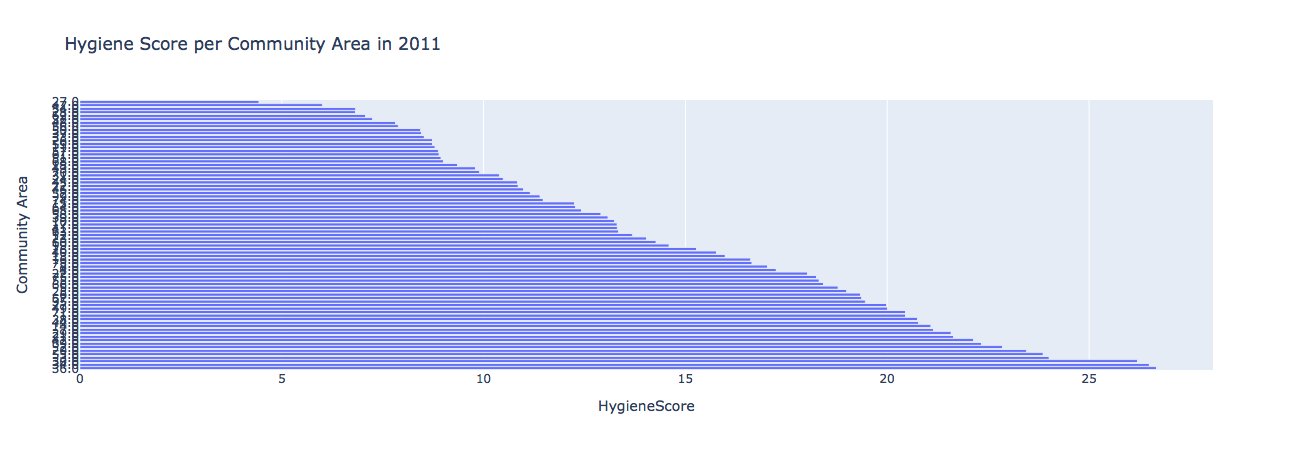

In [12]:
commarea = com_eat2011['Community Area']
fig = go.Figure(go.Bar(x=com_eat2011['2011'], y=commarea, orientation='h'))

fig.update_layout(title_text='Hygiene Score per Community Area in 2011', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='HygieneScore'))

fig.show()

### Comments :
Again, the two figures here show that there is **no particular trend**. No need to diplay for each year : neither the top 10 nor the bottom 10 are alike.

### Correlation

The **corr** function give the pearson coefficient between the `HygieneScores` and the `Community Areas`.

In [13]:
com_eat.corr()

2010      2011      2012      2013      2014      2015      2016  \
2010    1.000000  0.219021 -0.014295 -0.083451  0.075500  0.134953  0.197755   
2011    0.219021  1.000000  0.399013  0.058771  0.041936  0.172700  0.183595   
2012   -0.014295  0.399013  1.000000  0.309708  0.105353  0.419820  0.177138   
2013   -0.083451  0.058771  0.309708  1.000000 -0.167778  0.027192  0.054090   
2014    0.075500  0.041936  0.105353 -0.167778  1.000000 -0.134584 -0.143028   
2015    0.134953  0.172700  0.419820  0.027192 -0.134584  1.000000  0.397717   
2016    0.197755  0.183595  0.177138  0.054090 -0.143028  0.397717  1.000000   
2017    0.254113  0.337891  0.274765 -0.018067 -0.023692  0.022553 -0.034781   
2018    0.182831  0.502094  0.397251  0.126945 -0.101560  0.329746  0.337202   
2019   -0.028822  0.112752  0.180689  0.259325  0.134488 -0.041976  0.113280   
Median  0.351353  0.629841  0.671287  0.240416  0.132588  0.488413  0.507494   

            2017      2018      2019    Median  
2010    0.254113  0.182831 -0.028822  0.351353  
2011    0.337891  0.502094  0.112752  0.629841  
2012    0.274765  0.397251  0.180689  0.671287  
2013   -0.018067  0.126945  0.259325  0.240416  
2014   -0.023692 -0.101560  0.134488  0.132588  
2015    0.022553  0.329746 -0.041976  0.488413  
2016   -0.034781  0.337202  0.113280  0.507494  
2017    1.000000  0.439315 -0.079306  0.426769  
2018    0.439315  1.000000 -0.089256  0.571023  
2019   -0.079306 -0.089256  1.000000  0.240508  
Median  0.426769  0.571023  0.240508  1.000000

### Conclusion :
**Considering the constant variations in the food domain, the results obtained could simply indicated that the inspections are fair, following the phenomenon of changes, unpredictable due to the behaviors in the restauration industry.**

---

### Dataframe Loading

The *types* DataFrame gathers the result of the inspections for each `FacilityGroup`.

In [14]:
types = pd.read_csv('Eat_Type_Year.csv',sep=',') #creation of the dataframe

In [15]:
types = types.drop(0)
types = types.drop(columns='Unnamed: 0')

To begin, the statut of the establishment (*Private* or *Public*) is added to the DataFrame so that the difference between the two could be well visualized.

In [16]:
def sep(row):
    if row['FacilityGroup'] in ['bakery_restaurant', 'grocery_restaurant', 'bar_restaurant', 'banquet',\
                               'catering', 'restaurant', 'golden_diner', 'rooftop_restaurant', 'liquor_restaurant'] :
        return 'Public'
    if row['FacilityGroup'] in ['adultcare', 'childrens_services', 'daycare', 'school'] :
        return 'Private'

In [17]:
types['Stat'] = types.apply (lambda row: sep(row), axis=1)
types

FacilityGroup       2010       2011       2012       2013       2014  \
1            adultcare  33.910798  39.953846  35.508380  38.783505  40.306667   
2    bakery_restaurant   5.000000  24.000000  64.000000  81.500000   8.000000   
3              banquet   4.000000  81.937500  63.000000  50.793103  42.250000   
4       bar_restaurant  76.250000   4.500000  45.555556  64.000000  69.500000   
5             catering  42.032258  32.092784  38.716216  24.678161  24.304762   
6              daycare  34.079172  31.232648  35.620979  29.519380  34.801170   
7         golden_diner  30.386364  43.945946   9.621622  25.774194  15.529412   
8   grocery_restaurant  50.058824  33.687500  59.625000  45.916667  19.071429   
9    liquor_restaurant        NaN   0.000000        NaN        NaN        NaN   
10          restaurant  40.378860  41.392556  40.047406  35.031800  36.985640   
11  rooftop_restaurant   0.000000  55.250000  19.000000   2.000000  14.000000   
12              school  23.309795  28.157504  32.976542  24.825022  28.070473   

         2015       2016       2017        2018        2019     Stat  
1   33.133047  38.318182  41.488000   73.512605   62.645933  Private  
2         NaN        NaN        NaN         NaN         NaN   Public  
3   18.608696  14.931034  27.533333  163.368421   90.312500   Public  
4   69.166667  48.625000  27.500000   91.333333   24.500000   Public  
5   37.810345  32.943548  32.922330   44.378049   65.550562   Public  
6   19.871795  23.569061  25.119181   43.782609   46.995305  Private  
7   24.622951  24.681159  28.096774   45.967213   37.142857   Public  
8   15.875000  57.312500  81.142857  109.000000  110.444444   Public  
9         NaN        NaN        NaN         NaN         NaN   Public  
10  41.157266  40.921986  41.441261   60.265968   90.780985   Public  
11   1.333333   1.500000        NaN         NaN         NaN   Public  
12  30.290861  31.385321  30.081456   41.584048   40.268215  Private

Then two DataFrames *private* and *public* are created slicing the *types* DataFrame. This way, they can be put on a same figure but well separated.

In [18]:
private = types.loc[types['Stat'] == 'Private']
private = pd.DataFrame(private)
private['Median'] = private.median(axis=1)

public = types.loc[types['Stat'] == 'Public']
public = pd.DataFrame(public)
public['Median'] = public.median(axis=1)

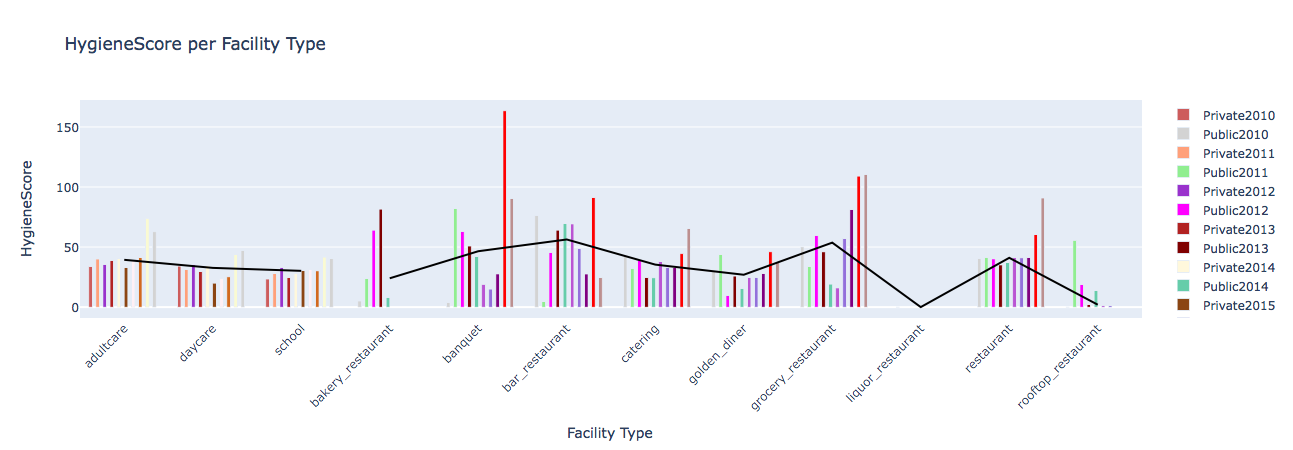

In [19]:
fig = go.Figure()
colorlist1 = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate', 'lightgoldenrodyellow', 'lightgray')
colorlist2 = ('lightgrey', 'lightgreen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumorchid', 'mediumpurple', 'purple', 'red', 'rosybrown')
c = 0
for x in range(2010, 2020) :
    x = str(x)
    fig.add_trace(go.Bar(x=private.FacilityGroup, y=private[x], name='Private'+x, marker_color=colorlist1[c]))
    fig.add_trace(go.Bar(x=public.FacilityGroup, y=public[x], name='Public'+x, marker_color=colorlist2[c]))
    c += 1

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)

    fig.update_layout(title_text='HygieneScore per Facility Type', xaxis=dict(title='Facility Type'), yaxis=dict(title='HygieneScore'))

fig.add_trace(go.Scatter(x=private.FacilityGroup, y=private['Median'], name='Median', marker_color='black', mode='lines'))
fig.add_trace(go.Scatter(x=public.FacilityGroup, y=public['Median'], name='Median', marker_color='black', mode='lines'))
fig.show()

### Comments :
On this figure, we can study the differences between `Public` and `Private` establishments.

The same **no particular trend** can be observed for the `Public` establishments, except for the `Restaurant` type of facility which happens to have no important variations until *2018* where, then for *2019*, the rise of the `HygieneScores` is huge. The `Restaurant` type of facility is the one with the more entries in the dataset.

For the `Private` establishments, we can say that the `HygieneScores` are more stable. They seems to follow the same trend, with a rise in *2018* and *2019*.

### Conclusion :
**The Private establishements are the more sensitive. Because of the way they works - children, elderly are in their care and are often expensive - they generally have to follow specific rules. Their particular duty could explain the fact that their results are more constant than the ones of the Public establishments.**

---

### Dataframe Loading

The *crime* DataFrame gathers the mediane of the `CrimeScores` of all the inspections for each `Community Area` per `Year`.

In [20]:
crime = pd.read_csv('Crime_Year_CommArea.csv',sep=',') #creation of the dataframe

In [21]:
crime = crime.drop(0)
crime = crime.drop(columns='Unnamed: 0')

In [22]:
crime.head()

Community Area    2010    2011    2012    2013    2014    2015    2016  \
1             1.0  3572.3  3329.1  2874.9  2447.0  2262.3  2196.0  2380.6   
2             2.0  3975.1  3584.9  3170.7  2526.7  2440.4  2238.1  2497.2   
3             3.0  2884.2  2849.6  3032.2  2244.6  1917.7  2222.5  2110.1   
4             4.0  1851.2  1679.5  1767.3  1529.3  1173.1  1037.9  1274.5   
5             5.0  1592.9  1701.6  1664.4  1379.3  1145.8   958.6   937.3   

    2017  
1   86.0  
2  158.2  
3  120.2  
4   54.1  
5   30.7

In [23]:
crime['Community Area'] = crime['Community Area'].apply(str)

### General Visualization

The following figure allows to visualize the `CrimeScores` per `Year` for each `Community Area`. It is possible to unselect the year we don't want to display clicking on its label on the right of the figure.

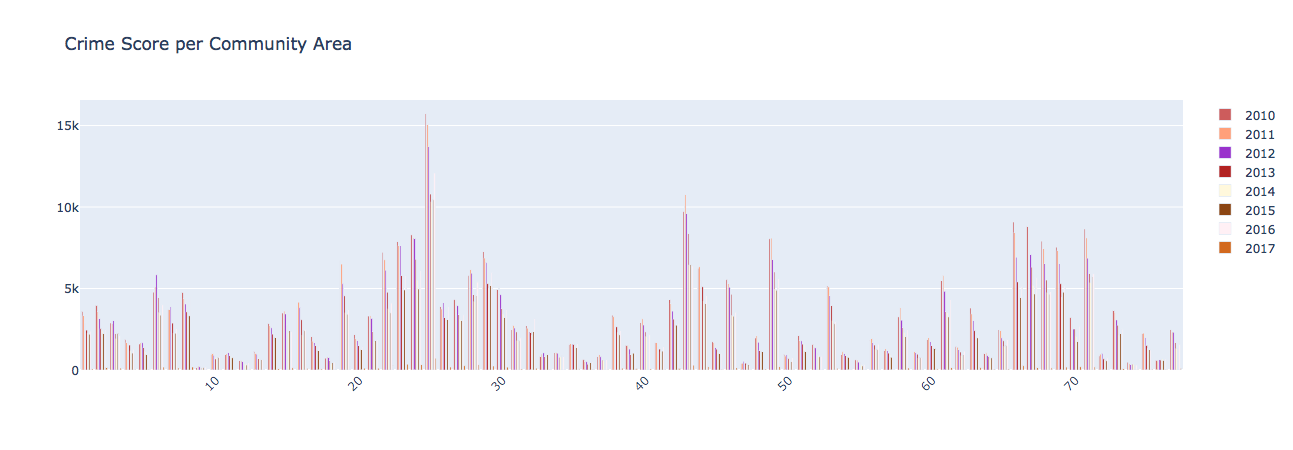

In [24]:
commarea = crime['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Bar(x=commarea, y=crime[x], name=x, marker_color=colorlist[c]))
    c += 1
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Crime Score per Community Area')

fig.show()

### Comments :
This figure allows to see in details the `CrimeScores` of each `Community Area`. 

What we can already see is that the `CrimeScore` are very different **inter**-`Community Areas`, but stay in the same ranges **intra**-`Community Areas`. Mostly, the `CrimeScores` have decreased between 2010 and 2015, then have rised in 2016.
This rise cannot be explain by our analysis of the *Chicago Food Inspections*, but it already has been discussed. Quickly searching on Google, many articles relate this trend : 

"The city's overall crime rate, especially the violent crime rate, is higher than the US average. Chicago was responsible for nearly half of 2016's increase in homicides in the US, though the nation's crime rates remain near historic lows. The reasons for the higher numbers in Chicago remain unclear." - https://en.wikipedia.org/wiki/Crime_in_Chicago

Apparently, their analysis of the *Chicago Food Inspections* could not have explained it either.

The second observation is that the numbers for 2017 are very low. The high difference with the rest of the data is not normal, so that we think that there is a problem with the file used.

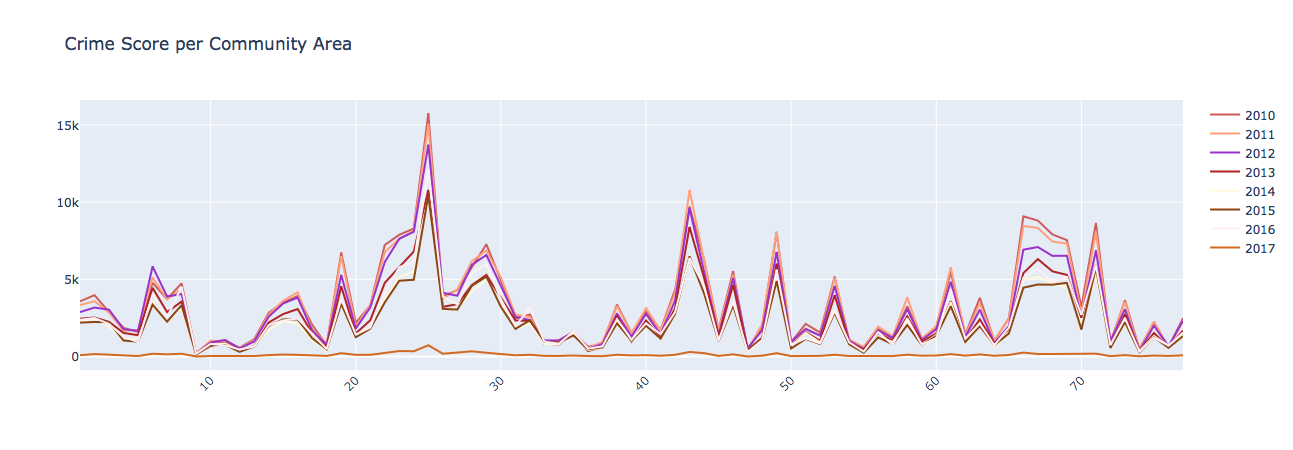

In [25]:
commarea = crime['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Scatter(x=commarea, y=crime[x], name=x, marker_color=colorlist[c]))
    c += 1
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Crime Score per Community Area')

fig.show()

### Comments :
The point of view on this figure allows to well visualized the fact that there is a general trend in which the `CrimeScores` varie linearly by `CommunityArea`.

### Visualization Year By Year

The following figure allows to visualize the results in the descending order : the top `Community Areas` have the best `CrimeScore` (the *lowest*).

In [26]:
crime2010 = crime.sort_values(by=['2010'], ascending=False)

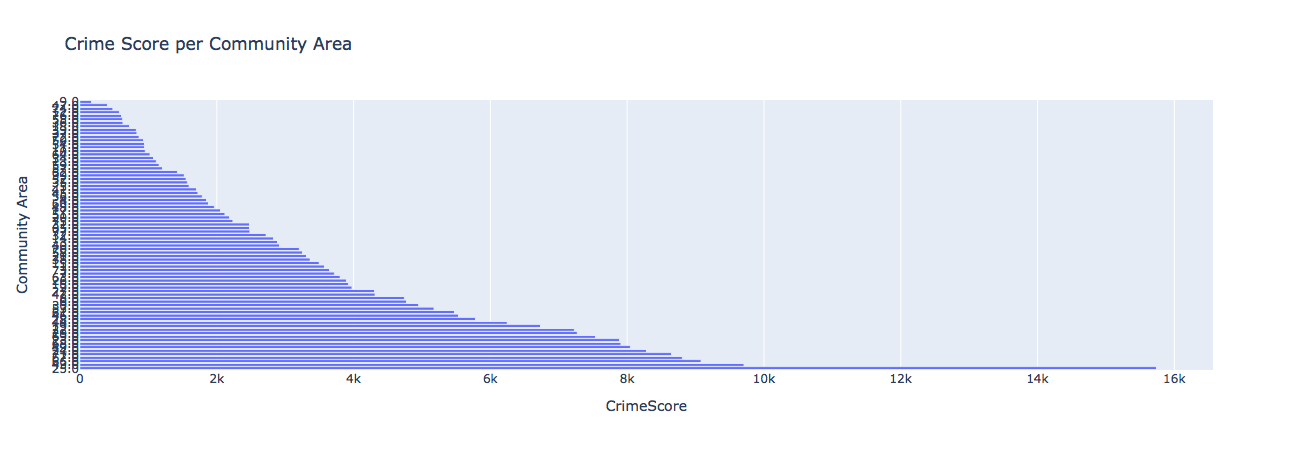

In [27]:
commarea = crime2010['Community Area']
fig = go.Figure(go.Bar(x=crime2010['2010'], y=commarea, orientation='h'))

fig.update_layout(title_text='Crime Score per Community Area', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='CrimeScore'))

fig.show()

In [28]:
crime2011 = crime.sort_values(by=['2011'], ascending=False)

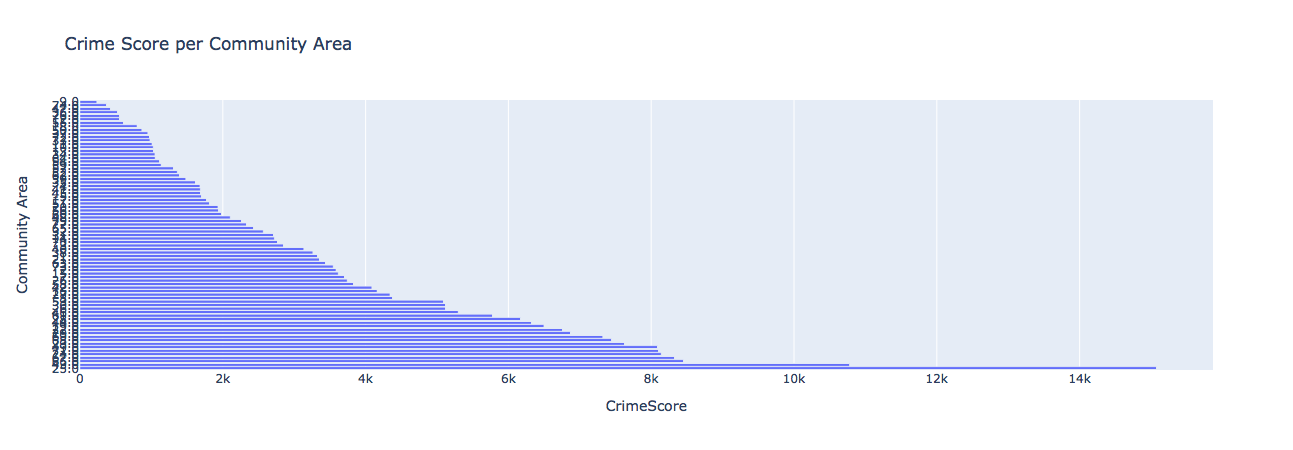

In [29]:
commarea = crime2011['Community Area']
fig = go.Figure(go.Bar(x=crime2011['2011'], y=commarea, orientation='h'))

fig.update_layout(title_text='Crime Score per Community Area', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='CrimeScore'))

fig.show()

### Comments :
This time, the two figures are showing the same trends. The same `Community Areas` are found, not exactly in the same order but still.

### Correlation

The **corr** function give the pearson coefficient between the `CrimeScores` and the `Community Areas`.

In [30]:
crime.corr()                   

2010      2011      2012      2013      2014      2015      2016  \
2010  1.000000  0.995976  0.988682  0.987405  0.988849  0.981853  0.974403   
2011  0.995976  1.000000  0.993438  0.992617  0.990226  0.984236  0.973757   
2012  0.988682  0.993438  1.000000  0.994380  0.991441  0.986420  0.978517   
2013  0.987405  0.992617  0.994380  1.000000  0.990561  0.984646  0.975407   
2014  0.988849  0.990226  0.991441  0.990561  1.000000  0.994928  0.990790   
2015  0.981853  0.984236  0.986420  0.984646  0.994928  1.000000  0.991769   
2016  0.974403  0.973757  0.978517  0.975407  0.990790  0.991769  1.000000   
2017  0.906973  0.905796  0.921659  0.903842  0.927982  0.926869  0.940425   

          2017  
2010  0.906973  
2011  0.905796  
2012  0.921659  
2013  0.903842  
2014  0.927982  
2015  0.926869  
2016  0.940425  
2017  1.000000

### Conclusion :
**The CrimeScore really is related to the place.**

---

### Hygiene VS Crime


### Visualization using a Double Y axis



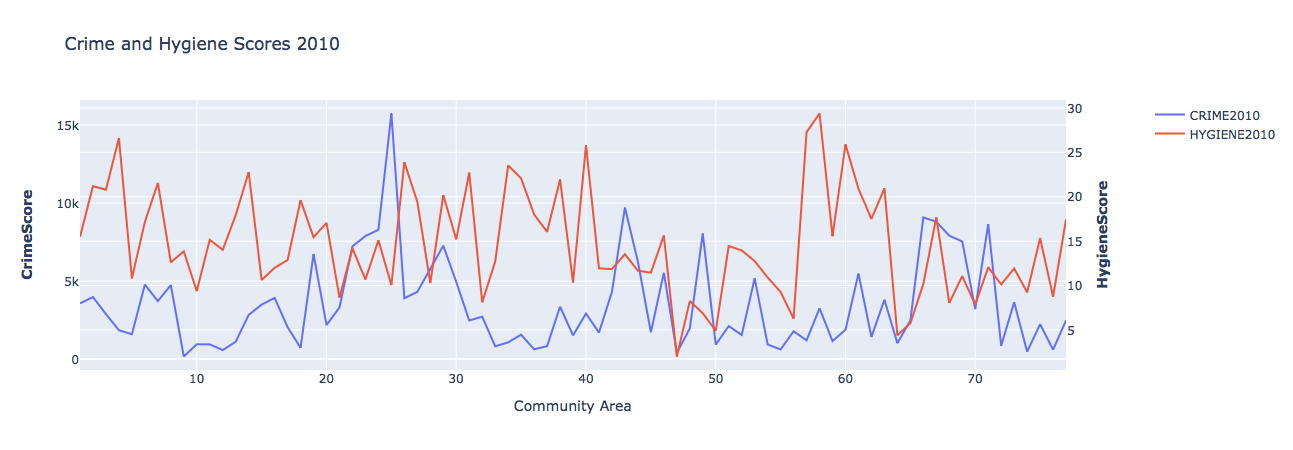

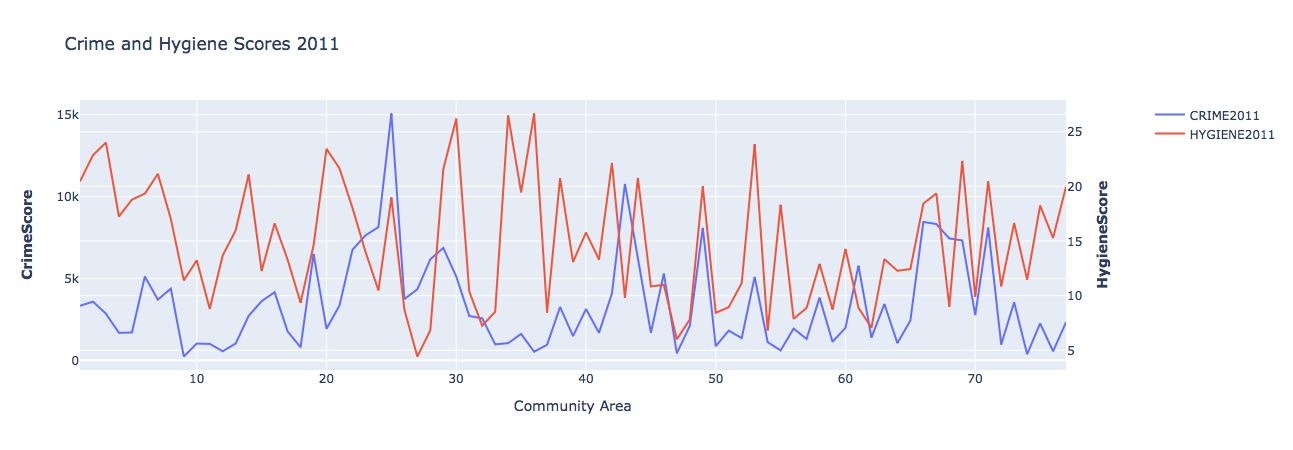

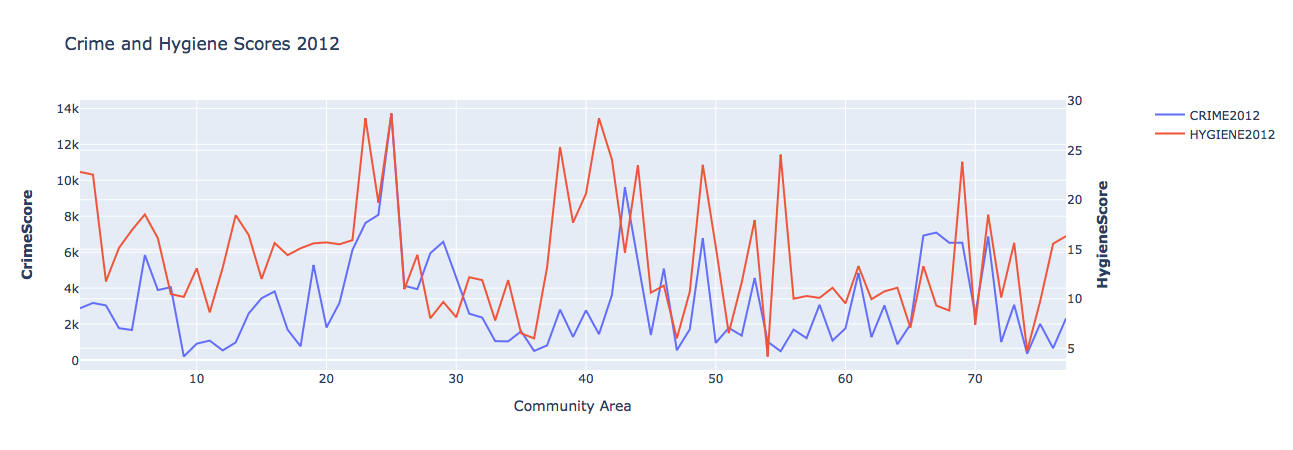

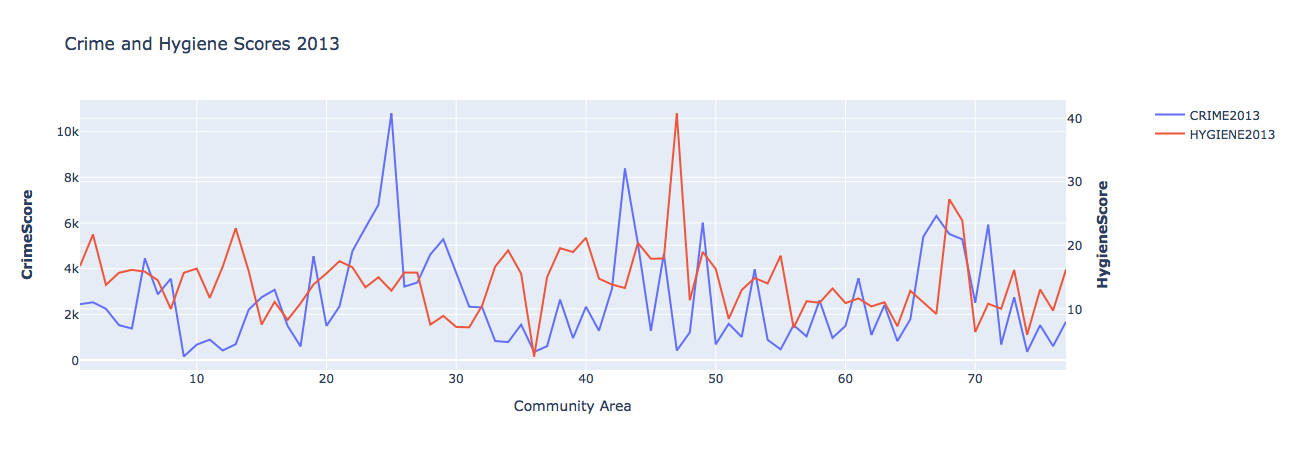

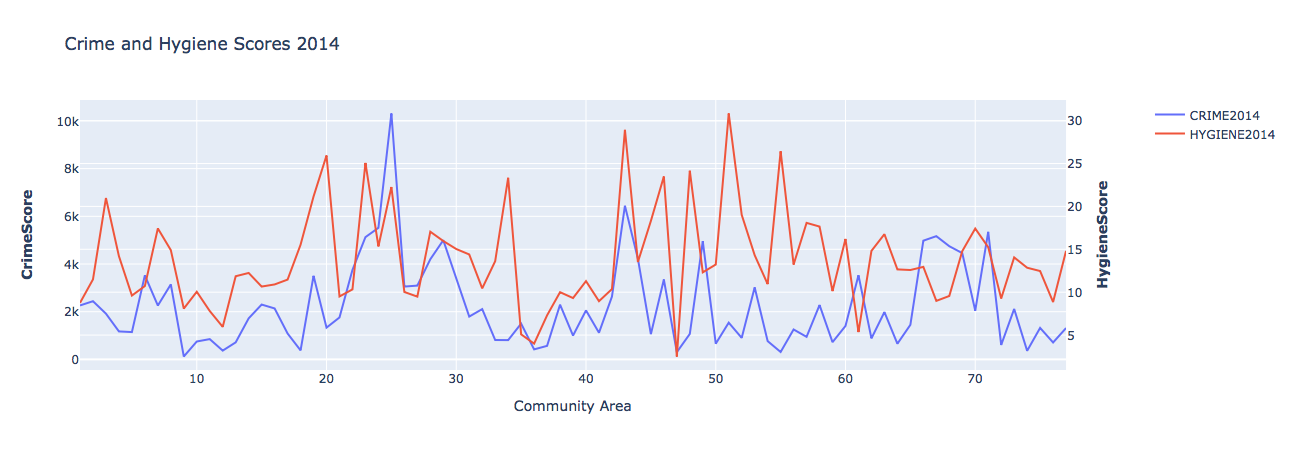

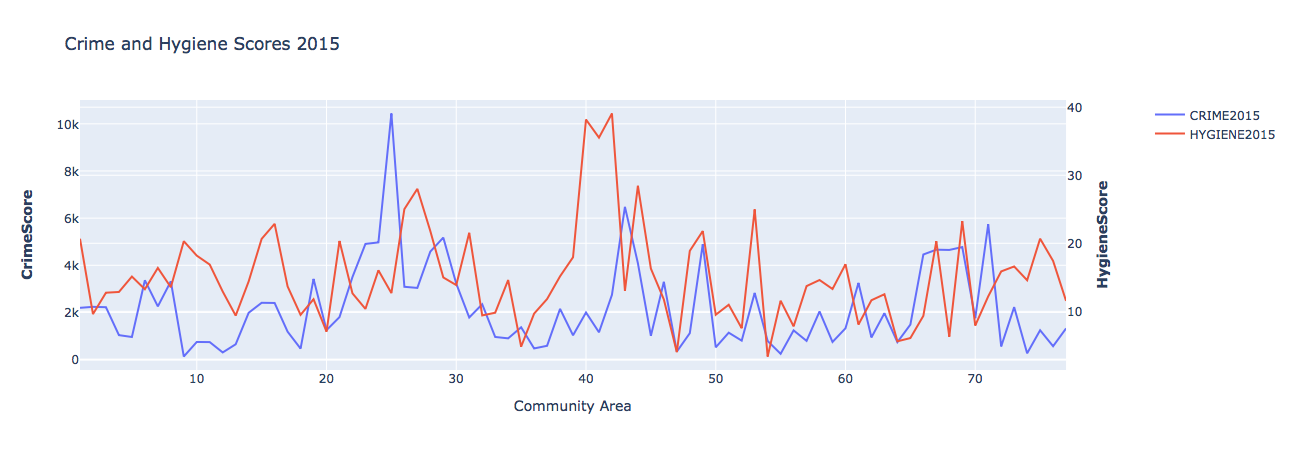

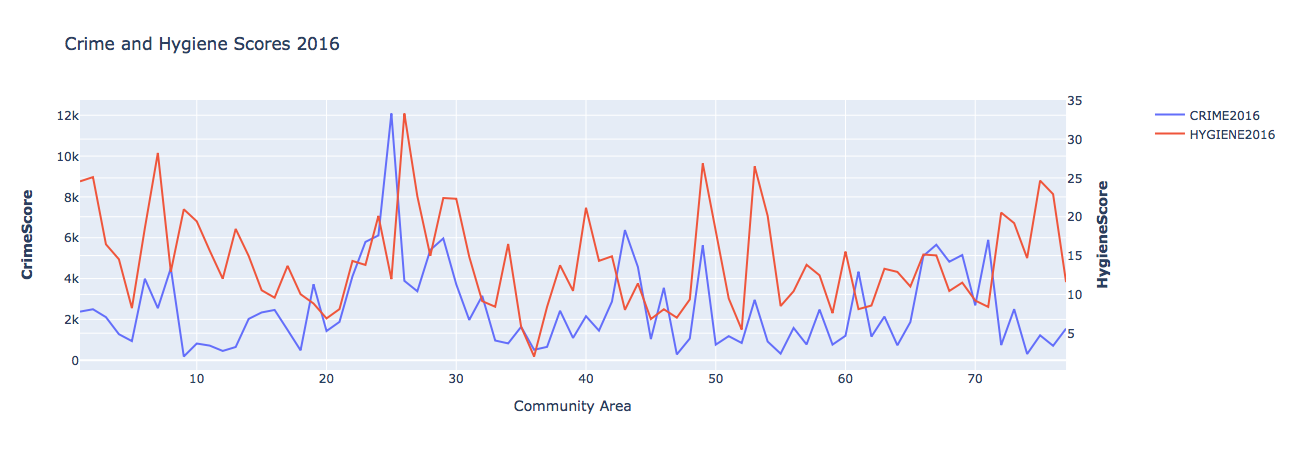

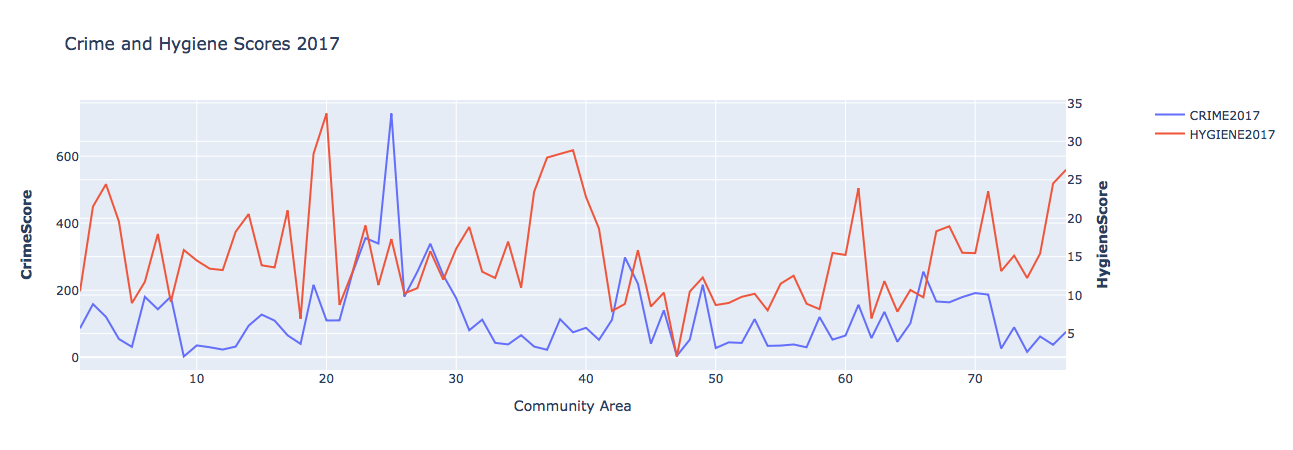

In [31]:
for n in range(2010, 2018) :
    n = str(n)
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(go.Scatter(x=crime['Community Area'], y=crime[n], name="CRIME" + n), secondary_y=False,)

    fig.add_trace(go.Scatter(x=com_eat['Community Area'], y=com_eat[n], name="HYGIENE" + n), secondary_y=True,)

    # Add figure title
    fig.update_layout(title_text="Crime and Hygiene Scores " + n)

    # Set x-axis title
    fig.update_xaxes(title_text="Community Area")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>CrimeScore</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>HygieneScore</b>", secondary_y=True)

    fig.show()

### Comments :

It is hard to say anything relevant yet. Another calculation could be useful.

### Dataframe Loading

The *eat_crime* DataFrame gathers the `CrimeScores` and `HygieneScores` of all the inspections for each `Community Area`.

In [32]:
eat_crime = pd.read_csv('Crime_Eat_CommArea.csv',sep=',') #creation of the dataframe

In [33]:
eat_crime = eat_crime.drop(0)

In [34]:
eat_crime.head()

Community Area  InspectionScore  Crime Score
1             1.0        21.032729      26844.0
2             2.0        23.535992      28176.7
3             3.0        20.388101      23522.4
4             4.0        19.668405      14084.0
5             5.0        15.075107      13099.8

### Correlation

The **corr** function give the pearson coefficient between the `HygieneScores` and the `CrimeScores`.

In [35]:
eat_crime['InspectionScore'].corr(eat_crime['Crime Score'])

0.2709697512886892

### Conclusion :
**The CrimeScore and the HygieneScore are not correlated following the Pearson method.**

---

### Dataframe Loading

The *eat_crime* DataFrame gathers the `CrimeScores` and `HygieneScores` of all the inspections for each `Community Area`.

In [36]:
business = pd.read_csv('license_owner_score_number.csv',sep=',') #creation of the dataframe

In [37]:
business.head()

full name  InspectionScore  N Restaurants
0        A MOHIT         0.000000              1
1   AAMIR DAWOOD        24.636364             11
2  AAMIR HUSSAIN        20.000000              1
3     AAMIR KHAN         2.000000              1
4     AARON BUSH        37.000000              2

In [38]:
business['InspectionScore'].corr(business['N Restaurants'])

-0.08714836050283552